In [7]:
import pandas as pd
import numpy as np
import re
from nrclex import NRCLex
from tqdm import tqdm


In [4]:
data = pd.read_csv(r"C:\Users\psvka\OneDrive\Desktop\fall23\csc791\LOLgarithm\dataset\dataset.csv")

In [5]:
data.head()

,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False


In [6]:
jokes = list(data['text'])
emotion_map = {
    'fear' : 0,
    'anger': 1,
    'anticip':2,
    'anticipation':2,
    'trust':3,
    'surprise':4,
    'positive':5,
    'negative':6,
    'sadness':7,
    'disgust':8,
    'joy':9
}

In [8]:
pattern = r'[^A-Za-z0-9\s]'

op = []
for joke in tqdm(jokes):
    processed_joke = re.sub(pattern, '', joke)
    words = joke.split(' ')
    
    temp = [0]*10 
    for word in words:
        lexs = NRCLex(word).top_emotions
        for emotion, val in lexs:
            temp[emotion_map[emotion]]+=val
    temp = [i/len(words) for i in temp]
    op.append(temp)
    

100%|██████████| 200000/200000 [03:01<00:00, 1104.56it/s]


In [9]:
len(op), len(jokes), len(op)/len(jokes)

(200000, 200000, 1.0)

In [10]:
op[0:10]

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.02, 0.02, 0.0, 0.0, 0.02, 0.0, 0.02, 0.02, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.07833333333333334,
  0.02,
  0.0,
  0.03333333333333333,
  0.02,
  0.03333333333333333,
  0.045,
  0.045,
  0.025,
  0.0],
 [0.027777777777777776,
  0.0,
  0.0,
  0.037037037037037035,
  0.0,
  0.037037037037037035,
  0.027777777777777776,
  0.027777777777777776,
  0.027777777777777776,
  0.037037037037037035],
 [0.0,
  0.0,
  0.0,
  0.06666666666666667,
  0.0,
  0.16666666666666666,
  0.0,
  0.0,
  0.0,
  0.06666666666666667],
 [0.013333333333333334,
  0.013333333333333334,
  0.0,
  0.0,
  0.0,
  0.0,
  0.013333333333333334,
  0.013333333333333334,
  0.013333333333333334,
  0.0],
 [0.1111111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.015873015873015872,
  0.01587301587301

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
Y = list(data['humor'])

In [14]:
len(op), len(Y)

(200000, 200000)

In [15]:
train_data_X, test_data_X, train_data_Y, test_data_Y = train_test_split(op, Y, test_size=0.3)

In [43]:
model = DecisionTreeClassifier(max_depth=5)

In [44]:
model.fit(train_data_X, train_data_Y)

DecisionTreeClassifier(max_depth=5)

In [45]:
model.score(train_data_X, train_data_Y)

0.6217

In [46]:
preds = model.predict(test_data_X)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(preds, test_data_Y))

              precision    recall  f1-score   support

       False       0.45      0.69      0.54     19380
        True       0.80      0.59      0.68     40620

    accuracy                           0.62     60000
   macro avg       0.63      0.64      0.61     60000
weighted avg       0.69      0.62      0.64     60000



In [49]:
from sklearn import tree
import matplotlib.pyplot as plt

In [50]:
feature_names = ['fear', 
    'anger',
    'anticip',
    'anticipation',
    'trust',
    'surprise',
    'positive',
    'negative',
    'sadness',
    'disgust',
    'joy']

              precision    recall  f1-score   support

       False       0.45      0.69      0.54     19380
        True       0.80      0.59      0.68     40620

    accuracy                           0.62     60000
   macro avg       0.63      0.64      0.61     60000
weighted avg       0.69      0.62      0.64     60000



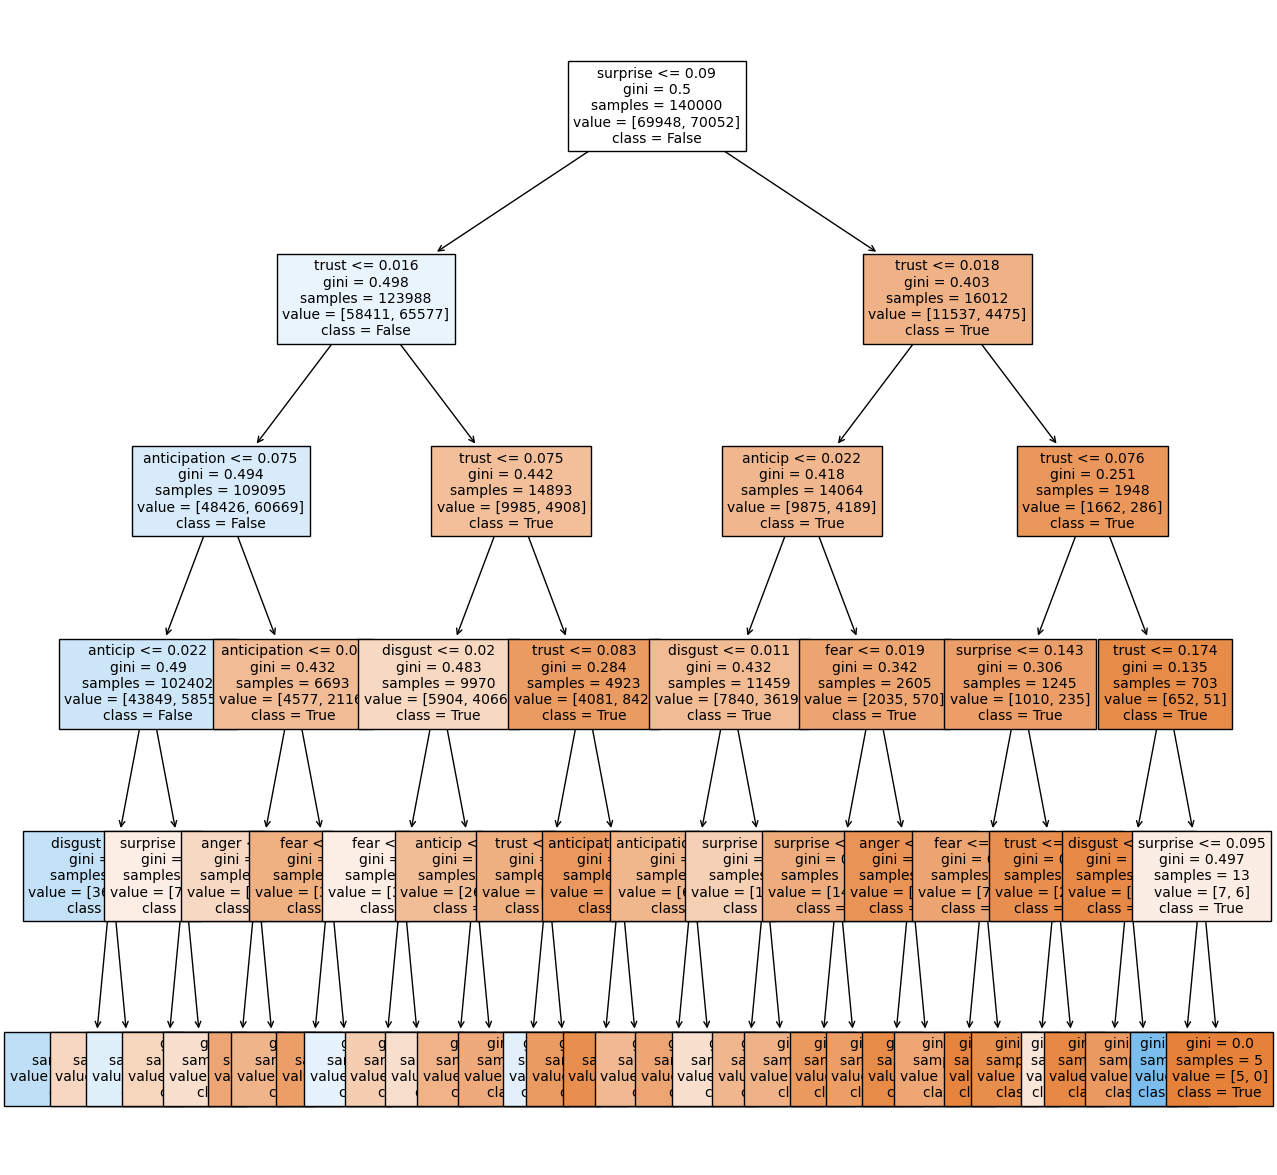

In [53]:
plt.figure(figsize=(15,15))
print(classification_report(preds, test_data_Y))
tree.plot_tree(model, feature_names=feature_names, class_names=['True', 'False'], filled=True, fontsize=10)
plt.show()

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\psvka\OneDrive\Desktop\fall23\csc791\LOLgarithm\dataset\dataset.csv")
features = pd.read_csv(r"C:\Users\psvka\Downloads\features_nlp.csv", index_col=0)

data['farthest'] = features['farthest']
data['closest'] = features['closest']

data.head()

,text,humor,farthest,closest
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False,0.500000,0.050000
1,Watch: darvish gave hitter whiplash with slow ...,False,0.500000,0.045455
2,What do you call a turtle without its shell? d...,True,0.333333,0.043478
3,5 reasons the 2016 election feels so personal,False,0.333333,0.062500
4,"Pasco police shot mexican migrant from behind,...",False,0.500000,0.047619


In [4]:
data.to_csv(r"C:\Users\psvka\Downloads\data_with_distfeatures.csv")